
# Projet Maison 2

In [1]:
# import des modules usuels
import json
import numpy as np
import pandas as pd
from descartes import PolygonPatch
from matplotlib import pyplot
from shapely import geometry

# options d'affichage
pd.set_option("display.min_rows", 16)

In [2]:
# chargement et traitement des données
GEO = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")

# A COMPLETER avec les colonnes
# - lat, lon : latitude et longitude des communes
# - cp_ville : Code Postal + " " + "Commune"
GEO[['lat', 'lon']] = GEO["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
GEO['cp_ville'] = GEO['Code Postal'] + " " + GEO['Commune']
GEO.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,lat,lon,cp_ville
Code INSEE,,,,,,,,,,,,,
31080,31350,BOULOGNE-SUR-GESSE,HAUTE-GARONNE,MIDI-PYRENEES,Chef-lieu canton,301.0,2470.0,1.6,"43.2904403081, 0.650641474176","{""type"": ""Polygon"", ""coordinates"": [[[0.671852...",43.290440,0.650641,31350 BOULOGNE-SUR-GESSE
11143,11510,FEUILLA,AUDE,LANGUEDOC-ROUSSILLON,Commune simple,314.0,2426.0,0.1,"42.9291375888, 2.90138923544","{""type"": ""Polygon"", ""coordinates"": [[[2.906996...",42.929138,2.901389,11510 FEUILLA
43028,43200,BESSAMOREL,HAUTE-LOIRE,AUVERGNE,Commune simple,888.0,743.0,0.4,"45.1306448726, 4.07952494849","{""type"": ""Polygon"", ""coordinates"": [[[4.091674...",45.130645,4.079525,43200 BESSAMOREL
78506,78660,PRUNAY-EN-YVELINES,YVELINES,ILE-DE-FRANCE,Commune simple,155.0,2717.0,0.8,"48.5267627187, 1.80513972814","{""type"": ""Polygon"", ""coordinates"": [[[1.829610...",48.526763,1.805140,78660 PRUNAY-EN-YVELINES
84081,84310,MORIERES-LES-AVIGNON,VAUCLUSE,PROVENCE-ALPES-COTE D'AZUR,Commune simple,49.0,1042.0,7.6,"43.9337788848, 4.90875878315","{""type"": ""Polygon"", ""coordinates"": [[[4.927176...",43.933779,4.908759,84310 MORIERES-LES-AVIGNON


**Partie A**

- Compléter le chargement des données en ajoutant au dataframe `GEO`
    - les colonnes "lat" et "lon" avec la latitude et la longitude des communes
    - une colonne "cp_ville" avec le Code Postal + un espace + et le nom de la Commune
- Ecrire une fonction `search_city(lat, lon)` qui retourne le "cp_ville" de la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ecrire une fonction `dms2dec(deg, min, sec)` qui convertit les degrés, minutes, secondes en valeur numérique pour pouvoir utiliser la fonction précédente avec un GPS.

In [3]:
# fonction recherche de ville
def search_city(lat, lon):
    # Convertit en array pour optimiser les calcules avec numpy
    vectors = np.array([lat - GEO['lat'], lon - GEO['lon']]).transpose()
    # Calcule la distance du point (lat,lon) avec chacun des points du DataFrame
    distance = np.linalg.norm(vectors, axis=1)
    # Récupère l'index pour faire la correspondance avec le DataFrame GEO
    index_min = np.argmin(distance)
    
    return GEO.iloc[index_min]['cp_ville']

In [4]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return float(deg) + float(mn)/60 + float(sec)/3600

In [5]:
# on applique la fonction à une coordonnée tirée au hasard
np.random.seed(0)
a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = np.random.uniform(a, b)
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
lon = np.random.uniform(a, b)

search_city(lat, lon)

'71330 BOSJEAN'

In [6]:
# à partir de coordonnées GPS précises
search_city(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

'91120 PALAISEAU'

**Partie B**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python **json** pour parser les valeurs de la colonne "geo_shape" et mettre le résultat (`Series`) dans la variable `GEO_SHAPE`.
- Ecrire une fonction `get_types()` qui retourne le décompte (`value_counts()`) des valeurs accédées avec la clé "type".
- Ecrire une fonction `get_coordinates_len()` qui retourne le décompte (`value_counts()`) des longueurs des listes accédées avec la clé "coordinates".
- Ecrire une fonction `get_most_complex_city()` qui retourne la commune est constituée du plus grand nombre de polygones ?
- Ecrire une fonction `get_nb_cities_2_polygons()` qui retourne  le nombre de villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- **Facultatif :**
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : on pourra installer la librairie **shapely**, utiliser la classe Polygon de **shapely.geometry**  et la méthode `contains()`. Sur Windows **shapely** peut nécessiter d'installer manuellement la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [7]:
# GEO_SHAPE

# La variable GEO_SHAPE doit contenir une Serie
# correspondant aux valeurs de la colonne "geo_shape" parsées avec la librairie json
GEO_SHAPE = pd.Series(dtype=object)
GEO_SHAPE = GEO["geo_shape"].apply(json.loads)
GEO_SHAPE.head()

Code INSEE
31080    {'type': 'Polygon', 'coordinates': [[[0.671852...
11143    {'type': 'Polygon', 'coordinates': [[[2.906996...
43028    {'type': 'Polygon', 'coordinates': [[[4.091674...
78506    {'type': 'Polygon', 'coordinates': [[[1.829610...
84081    {'type': 'Polygon', 'coordinates': [[[4.927176...
Name: geo_shape, dtype: object

In [8]:
# value_counts des valeurs "type"
def get_types():
    return GEO_SHAPE.apply(lambda x: x["type"]).value_counts()

In [9]:
# value_counts des longueurs de "coordinates"
def get_coordinates_len():
     return GEO_SHAPE.apply(lambda x: x["coordinates"]).str.len().value_counts()

In [10]:
# commune constituée du plus grand nombre de polygones
def get_most_complex_city():
    index_max = GEO_SHAPE.apply(lambda x: x["coordinates"]).str.len().idxmax()
    return GEO.loc[index_max]['cp_ville']

In [11]:
# commune constituée du plus grand nombre de polygones
def get_nb_cities_2_polygons():
    polygons = GEO_SHAPE.apply(lambda x: x["type"]) == "Polygon"
    two_coordinates = GEO_SHAPE.apply(lambda x: x["coordinates"]).str.len() == 2
    return len(GEO_SHAPE[polygons & two_coordinates])

In [12]:
# tests
import unittest

class Session2Test(unittest.TestCase):
    
    def test_partie_A1(self):
        # on applique la fonction cherche_ville() à une coordonnée tirée au hasard
        np.random.seed(0)
        a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
        lat = np.random.uniform(a, b)
        a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
        lon = np.random.uniform(a, b)

        cp_ville = search_city(lat, lon)
        self.assertEqual(cp_ville, "71330 BOSJEAN")
        
    def test_partie_A2(self):
        # à partir de coordonnées GPS précises
        cp_ville = search_city(dms2dec(48, 42, 52), dms2dec(2, 14, 45))
        self.assertEqual(cp_ville, "91120 PALAISEAU")
        
    def test_partie_B1(self):
        # check types
        dico = get_types()
        self.assertEqual(dico["Polygon"], 36670)
        self.assertEqual(dico["MultiPolygon"], 72)
        
    def test_partie_B2(self):
        # check coordinates len
        dico = get_coordinates_len()
        self.assertEqual(dico[1], 36660)
        self.assertEqual(dico[2], 80)
       
    def test_partie_B3(self):
        # check most complex city
        cp_ville = get_most_complex_city()
        self.assertEqual(cp_ville, "83400 HYERES")
        
    def test_partie_B4(self):
        # check nb cities 2 polygons
        nb = get_nb_cities_2_polygons()
        self.assertEqual(nb, 10)

In [13]:
# run tests
def run_tests():
    test_suite = unittest.makeSuite(Session2Test)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(test_suite)
    
run_tests()

test_partie_A1 (__main__.Session2Test) ... ok
test_partie_A2 (__main__.Session2Test) ... ok
test_partie_B1 (__main__.Session2Test) ... ok
test_partie_B2 (__main__.Session2Test) ... ok
test_partie_B3 (__main__.Session2Test) ... ok
test_partie_B4 (__main__.Session2Test) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.126s

OK


**Partie facultative**

In [14]:
# villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2
def get_cities_2_polygons():
    polygons = GEO_SHAPE.apply(lambda x: x["type"]) == "Polygon"
    two_coordinates = GEO_SHAPE.apply(lambda x: x["coordinates"]).str.len() == 2
    return GEO_SHAPE[polygons & two_coordinates]

def check_first_poly_contains_second(index,city):
    print(GEO.loc[index]['cp_ville'])
    outer = city['coordinates'][0]
    polygon1 = geometry.Polygon(outer)
    inner = city['coordinates'][1]
    polygon2 = geometry.Polygon(inner)
    if polygon1.contains(polygon2):
        print("Le premier polygone contient bien le second (1er polygone en vert, second en blanc)")
        return geometry.Polygon(outer, [inner])
    else:
        print("Le premier polygone ne contient pas le second !")

20100 SARTENE
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


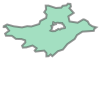

48300 LANGOGNE
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


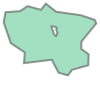

09240 LA BASTIDE-DE-SEROU
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


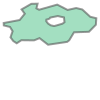

71270 BEAUVERNOIS
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


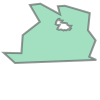

22650 PLOUBALAY
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


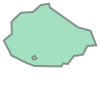

02600 COYOLLES
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


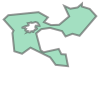

20214 CALENZANA
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


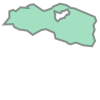

05600 EYGLIERS
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


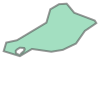

67920 SUNDHOUSE
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


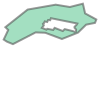

68420 EGUISHEIM
Le premier polygone contient bien le second (1er polygone en vert, second en blanc)


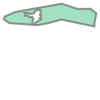

In [15]:
cities = get_cities_2_polygons()
for (index, city) in cities.items():
    display(check_first_poly_contains_second(index, city))